## Load modules
convexgating auf add_hull branch (05.12.2023)

In [1]:
import scanpy as sc
import convexgating as cg
import anndata as ann
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os

## Create data

In [2]:
n_features = 12
X,y = make_blobs(5000, n_features=n_features, centers=3,cluster_std = 3)

var_names = []
for j in range(1,n_features+1):
    var_names.append('feature_' +str(j))
    
adata = ann.AnnData(X=X)
adata.var.index = var_names

model = KMeans(n_clusters = 3)
model.fit(adata.X)
labels = model.labels_
adata.obs['KMeans'] = [str(i) for i in labels]

## Initialize
- adata: AnnData object
- cluster_string : column name in adata.obs
- cluster_numbers : list of cluster numbers/names in adata.obs[cluster_string] 
- save_path : path to save location
save_path : path to save locationt.

In [3]:
cluster_string = 'KMeans'
cluster_numbers = pd.unique(adata.obs[cluster_string])
save_path = os.path.join(os.getcwd(),'tutorial_01')

## Infer gating strategies

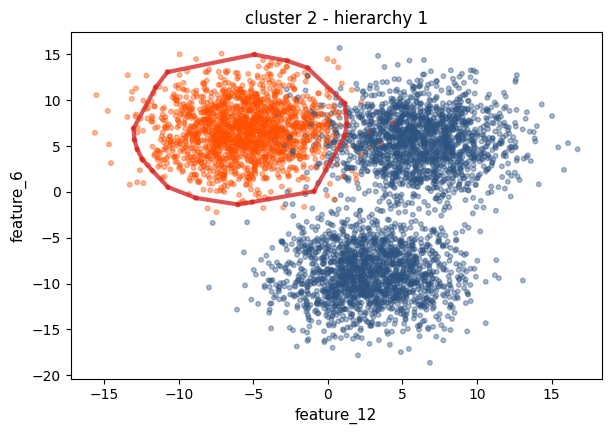

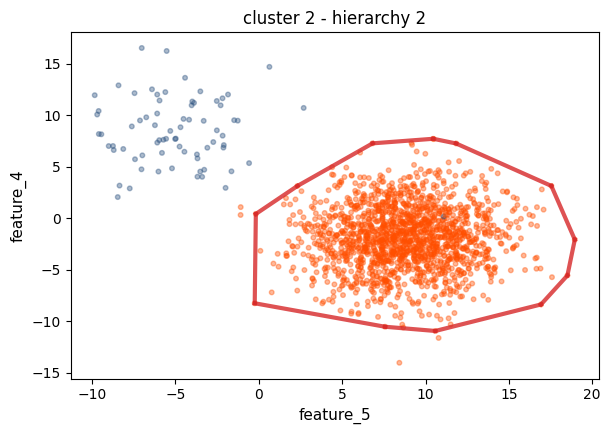

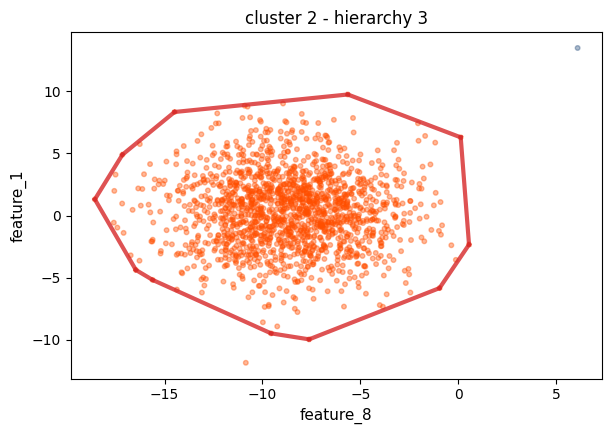

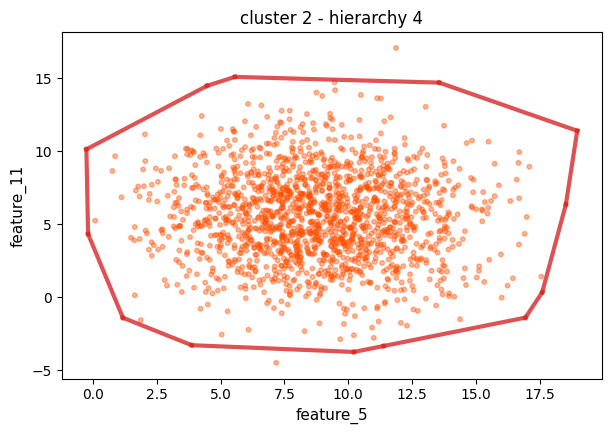

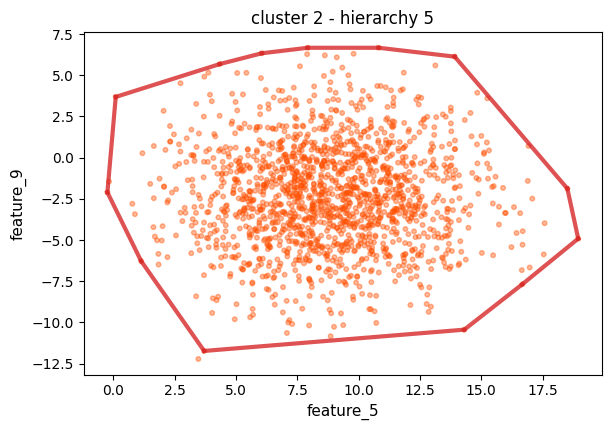

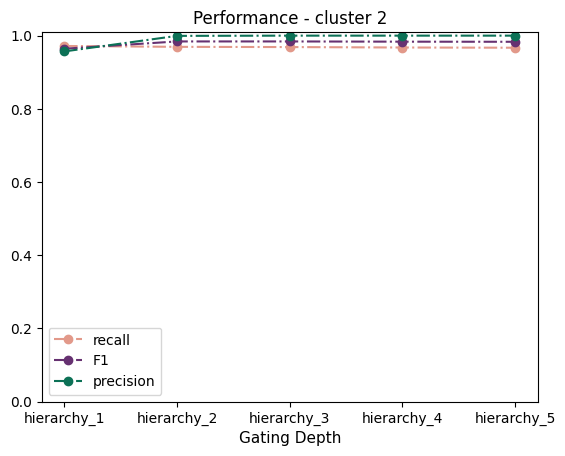

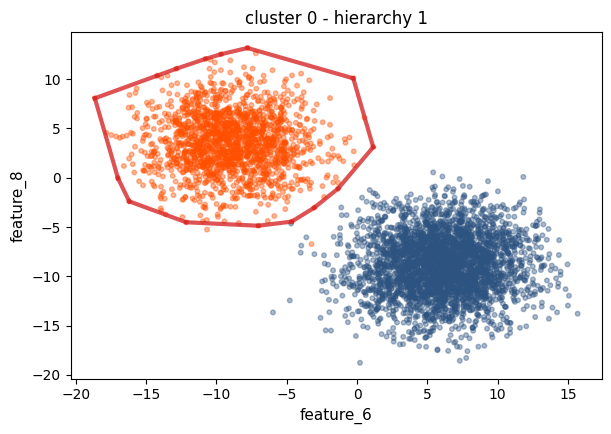

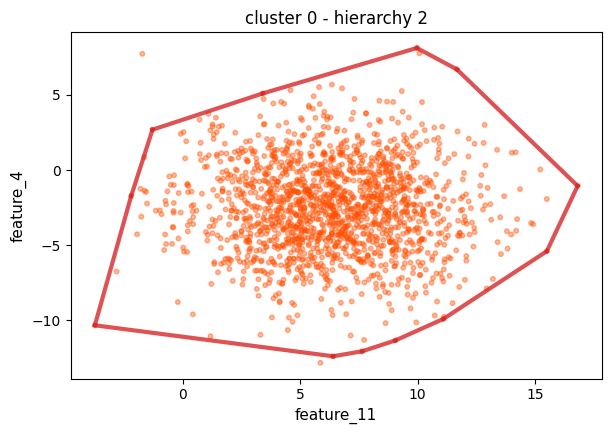

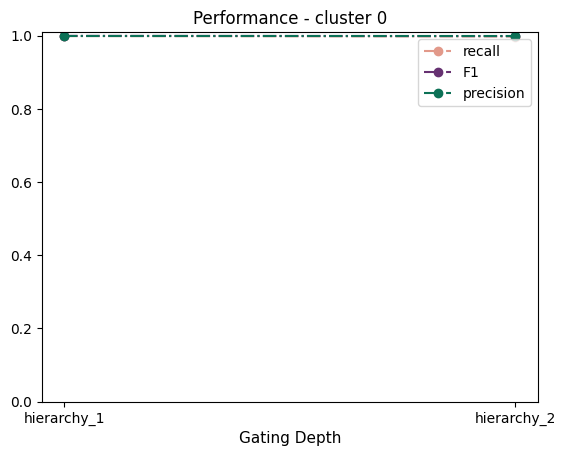

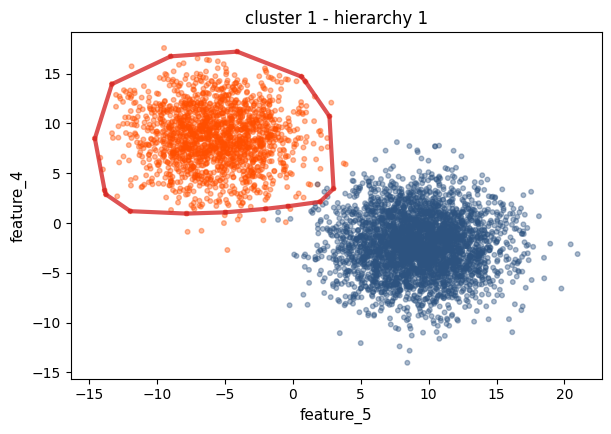

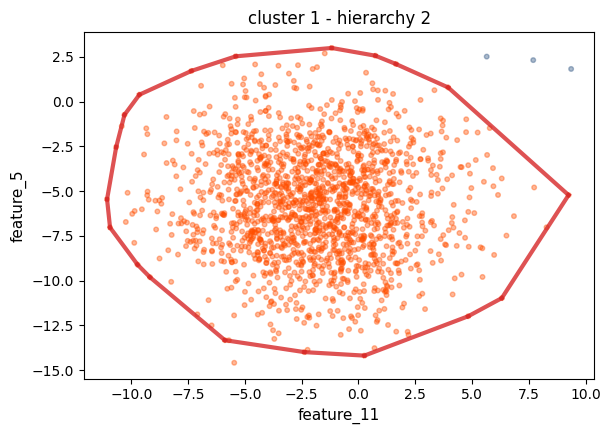

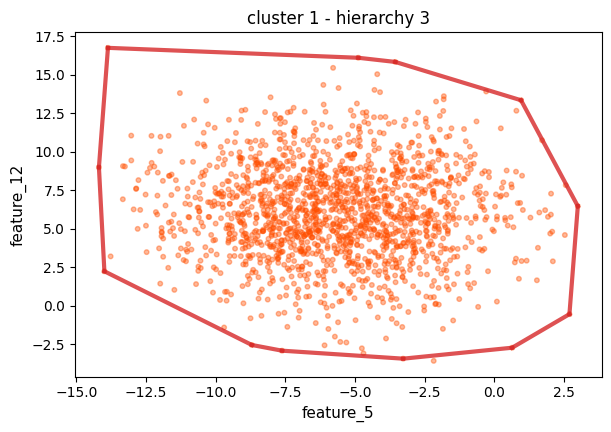

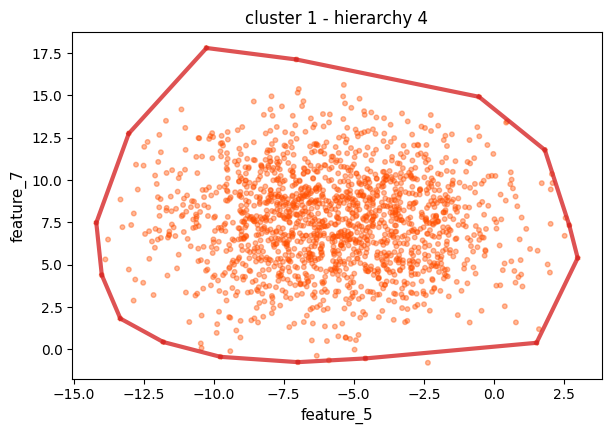

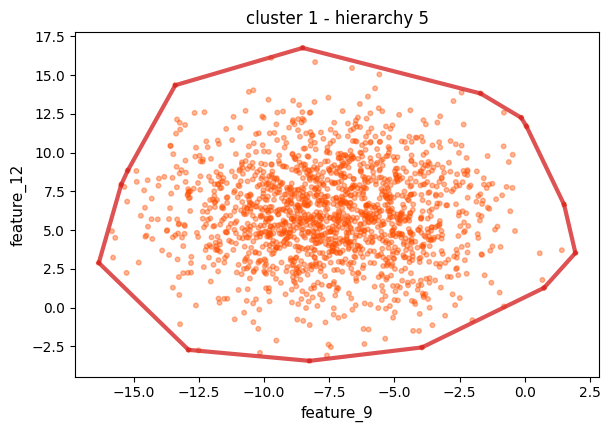

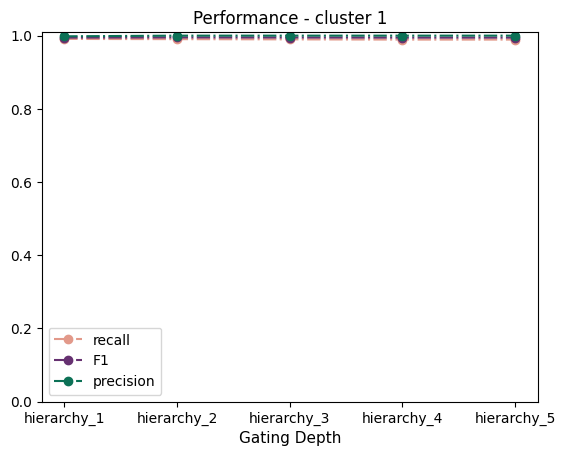

In [4]:
adata =  cg.tools.CONVEX_GATING(adata = adata,
                                cluster_numbers = cluster_numbers,
                                cluster_string = cluster_string,
                                save_path=save_path)

## Results

#### gating performance overview

In [27]:
adata.uns['gating_performance_summary']

,f1,recall,precision,hierarchy
cluster,,,,
2,0.984156,0.969388,0.999381,2
0,0.999400,0.998800,1.000000,1
1,0.995178,0.990402,1.000000,2


#### detailed gating performance 
cluster '2'

In [28]:
adata.uns['gating_performance']['2']

,hierarchy_1,hierarchy_2,hierarchy_3,hierarchy_4,hierarchy_5
f1,0.964264,0.984156,0.984146,0.983527,0.983216
recall,0.971789,0.969388,0.968788,0.967587,0.966987
precision,0.956856,0.999381,1.000000,1.000000,1.000000


used markers (all clusters)

#### used markers

In [29]:
adata.uns['gating_marker_summary']

,hierarchy,cluster
marker,,
feature_12,1,2
feature_6,1,2
feature_5,2,2
feature_4,2,2
feature_6,1,0
feature_8,1,0
feature_5,1,1
feature_4,1,1
feature_11,2,1


#### cell per gate overview 
cluster '2' 

In [30]:
adata.uns['gating']['2']

,final_gate_1,final_gate_2,final_gate_3,final_gate_4,final_gate_5
0,1,1,1,1,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4995,1,1,1,1,1
4996,1,1,1,1,1
4997,0,0,0,0,0
4998,1,1,1,1,1


#### gate locations in marker space
e.g. first hierarchy for cluster '2' 

In [32]:
adata.uns['gate_locations']['2']['hierarchy_1']

,x_coordinate,y_coordinate
0,-4.922177,14.968516
1,-10.744520,13.060479
2,-11.540059,11.399429
3,-13.021882,6.919518
4,-12.962907,5.672718
5,-12.778578,4.633321
6,-12.445109,3.546630
7,-11.758596,2.298159
8,-10.709503,0.506881
9,-8.839882,-0.670631
